#Import necessary libraries

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset

In [2]:
data = pd.read_csv("BreastCancer.csv")

#Display dataset

In [3]:
print("Dataset Overview:")
print(data.head())

Dataset Overview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area

#Drop unnecessary columns

In [4]:
if 'Unnamed: 32' in data.columns:
    data = data.drop(columns=['Unnamed: 32'])

#Map diagnosis to binary values

In [19]:
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

#Separate features and target

In [20]:
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

#Handle missing values

In [8]:
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

#Standardize the features

In [9]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

#Correlation heatmap of standardized features

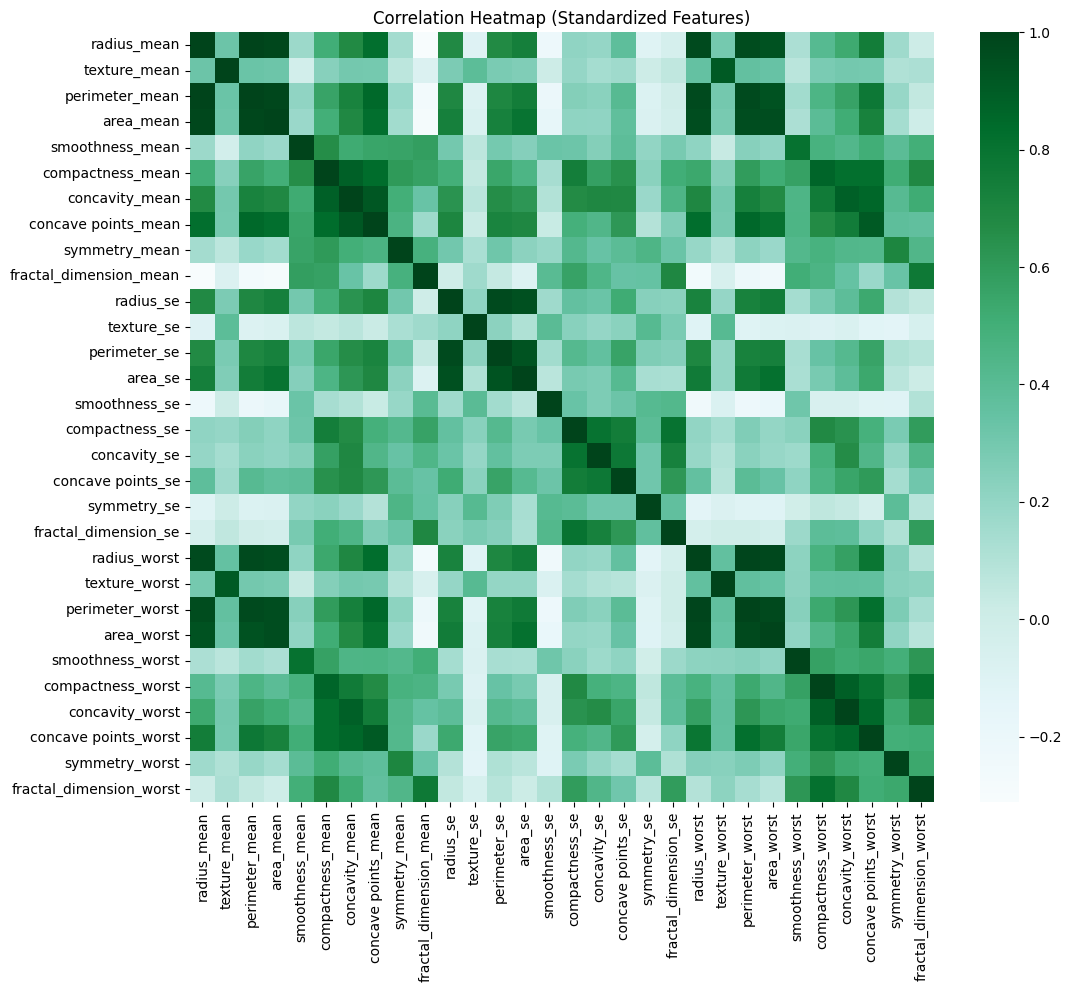

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled.corr(), cmap="BuGn", annot=False, fmt=".2f")
plt.title("Correlation Heatmap (Standardized Features)")
plt.show()

#Split the dataset into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#Train a Logistic Regression model

In [12]:
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

#Evaluate the model

In [13]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [14]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[71  1]
 [ 3 39]]


#Calculate and display AUC-ROC

In [15]:
auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nAUC-ROC Score: {auc:.2f}")


AUC-ROC Score: 1.00


#Plot the ROC curve

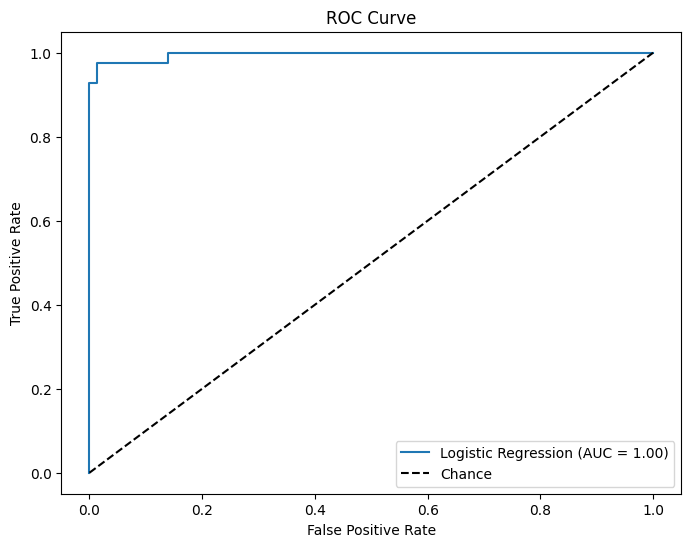

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

#Display coefficients of the logistic regression model

In [17]:
coefficients = pd.Series(model.coef_[0], index=X_scaled.columns).sort_values(ascending=False)

<ipython-input-18-cd5043fa68da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=coefficients.index, palette="mako")


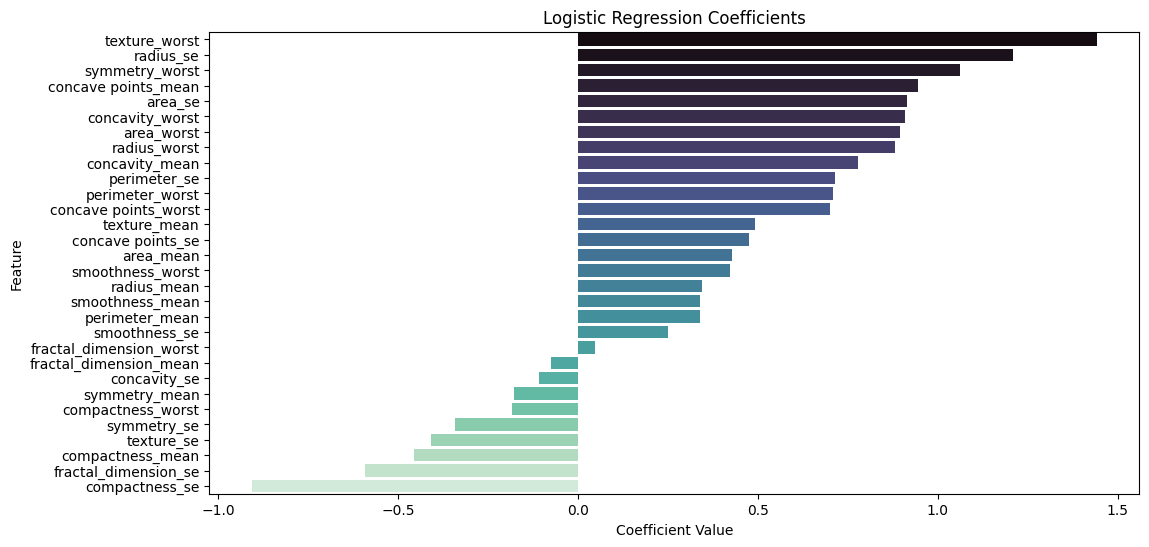

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients.values, y=coefficients.index, palette="mako")
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()